In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [3]:
orders = pd.read_csv(
    "/content/olist_orders_dataset.csv",
    parse_dates=[
        "order_purchase_timestamp",
        "order_delivered_customer_date",
        "order_estimated_delivery_date"
    ]
)

customers = pd.read_csv("/content/olist_customers_dataset.csv")
payments = pd.read_csv("/content/olist_order_payments_dataset.csv")


In [4]:
orders_delivered = orders[orders["order_status"] == "delivered"]


/tmp/ipython-input-4290987804.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="order_purchase_timestamp", freq="M"))


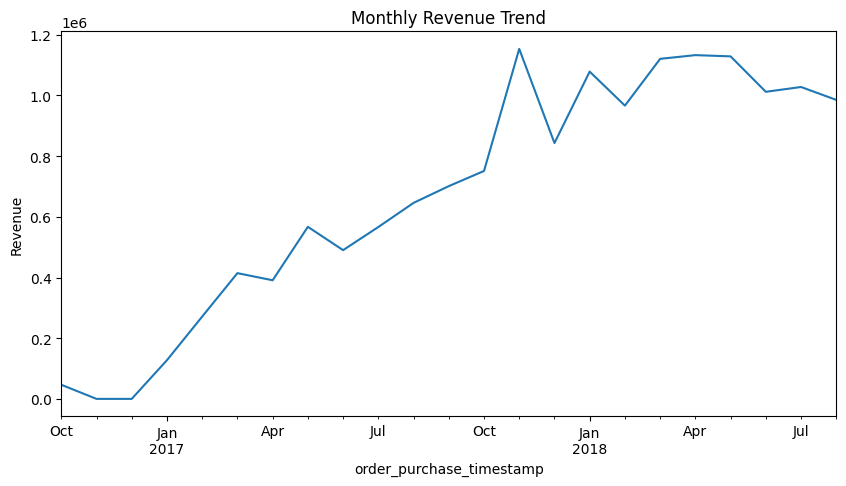

In [5]:
monthly_revenue = (
    orders_delivered
    .merge(payments, on="order_id")
    .groupby(pd.Grouper(key="order_purchase_timestamp", freq="M"))
    ["payment_value"]
    .sum()
)

monthly_revenue.plot(figsize=(10,5), title="Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()


/tmp/ipython-input-296999170.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="order_purchase_timestamp", freq="M"))


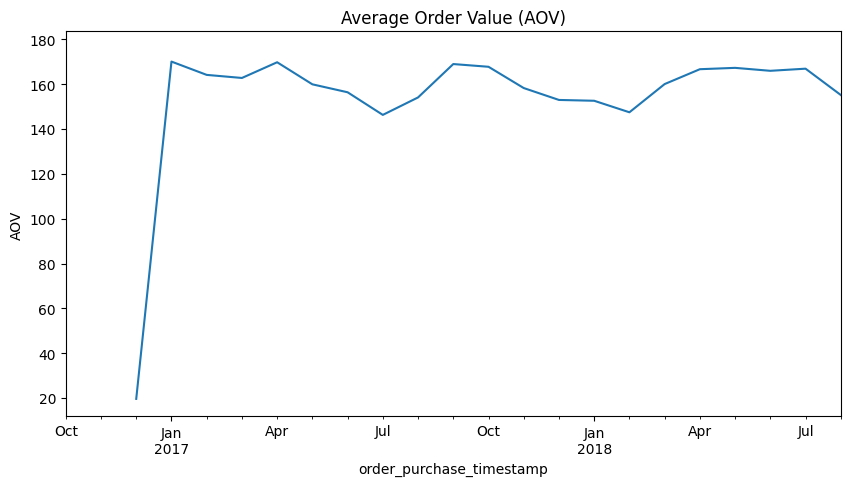

In [6]:
monthly_aov = (
    orders_delivered
    .merge(payments, on="order_id")
    .groupby(pd.Grouper(key="order_purchase_timestamp", freq="M"))
    .agg(
        revenue=("payment_value","sum"),
        orders=("order_id","nunique")
    )
)

monthly_aov["aov"] = monthly_aov["revenue"] / monthly_aov["orders"]

monthly_aov["aov"].plot(figsize=(10,5), title="Average Order Value (AOV)")
plt.ylabel("AOV")
plt.show()


Revenue growth is driven by increasing order volume rather than order value.
Average Order Value remains flat over time.
This indicates acquisition-led growth.